In [64]:
'''
Name   : Rupesh Garsondiya
github : @Rupeshgarsondiya
Topic  : Keras Functional model
'''

'\nName   : Rupesh Garsondiya\ngithub : @Rupeshgarsondiya\nTopic  : Keras Functional model\n'

# **Keras functional model**

- The Keras Functional API is an advanced and flexible way to create deep learning models in Keras. Unlike the Sequential API, which only supports a linear stack of layers, the Functional API enables the construction of complex architectures like multi-input/output models, shared layers, and directed acyclic graphs.

- Using the Keras Functional API, we can create multi-input and multi-output neural networks.
- It allows us to design complex architectures for solving complex problems




 - **The Keras Functional API**  is an advanced and flexible way to create deep learning models in Keras. Unlike the Sequential API, which only supports a linear stack of layers, the Functional API enables the construction of complex architectures like multi-input/output models, shared layers, and directed acyclic graphs.
Key Features

**Flexibility :**
    
- Allows creation of non-linear architectures (e.g., models with branches, skip connections, or shared layers).

- Multi-Input/Output Models:
Supports models with multiple inputs and outputs for handling diverse data types or tasks simultaneously.

- Intermediate Layer Outputs:
Easily access and reuse intermediate layers' outputs.

- Reusability:
Reuse the same model or layers in different parts of the architecture.




Now let's Understand with some small project and some complex architecture

**Refrance :**  Campus X Deep-Learning By Nitish Sir

**Link :** https://www.youtube.com/watch?v=OvQQP1QVru8&t=1170s

In [65]:
import tensorflow as tf
from tensorflow .keras.layers import Input,Dense, concatenate
from tensorflow.keras.models import Model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [66]:
# load the dataset
X,y = load_iris(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)





In [67]:
x = Input(shape=(3,))

In [68]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the input layer
x = Input(shape=(256,))  # Input shape is 256-dimensional (example size)

# Create the first hidden dense layer
h1 = Dense(128, activation="relu")(x)  # First hidden layer, connected to the input layer

# Create the second hidden dense layer
h2 = Dense(64, activation="relu")(h1)  # Second hidden layer, connected to the first hidden layer

# Create the third hidden dense layer
h3 = Dense(32, activation="relu")(h2)  # Third hidden layer, connected to the second hidden layer

# Define the first output layer
y1 = Dense(3, activation="softmax")(h3)  # First output layer, predicting 3 classes (e.g., classification task)

# Define the second output layer
y2 = Dense(1, activation="linear")(h3)  # Second output layer, predicting a single continuous value (e.g., regression task)

# Create the model by specifying the input and outputs
model = Model(inputs=x, outputs=[y1, y2])  # The model takes 'x' as input and produces 'y1' and 'y2' as outputs

# Compile the model
model.compile(optimizer='adam',
              loss=["categorical_crossentropy", "mse"],  # Loss for y1 and y2 respectively we can also set diffrent Loss function
              metrics={"dense_2": "accuracy", "dense_3": "mae"})  # Metrics for y1 and y2   we can also set diffrent metrics

# Print the summary of the model
model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 256)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_28 (Dense)          │ (None, 128)            │         32,896 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_29 (Dense)          │ (None, 64)             │          8,256 │ dense_28[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 32)             │          2,080 │ dense_29[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_31 (Dense)          │ (None, 3)              │             99 │ dense_30[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_32 (Dense)          │ (None, 1)              │             33 │ dense_30[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 43,364 (169.39 KB)

 Trainable params: 43,364 (169.39 KB)

 Non-trainable params: 0 (0.00 B)

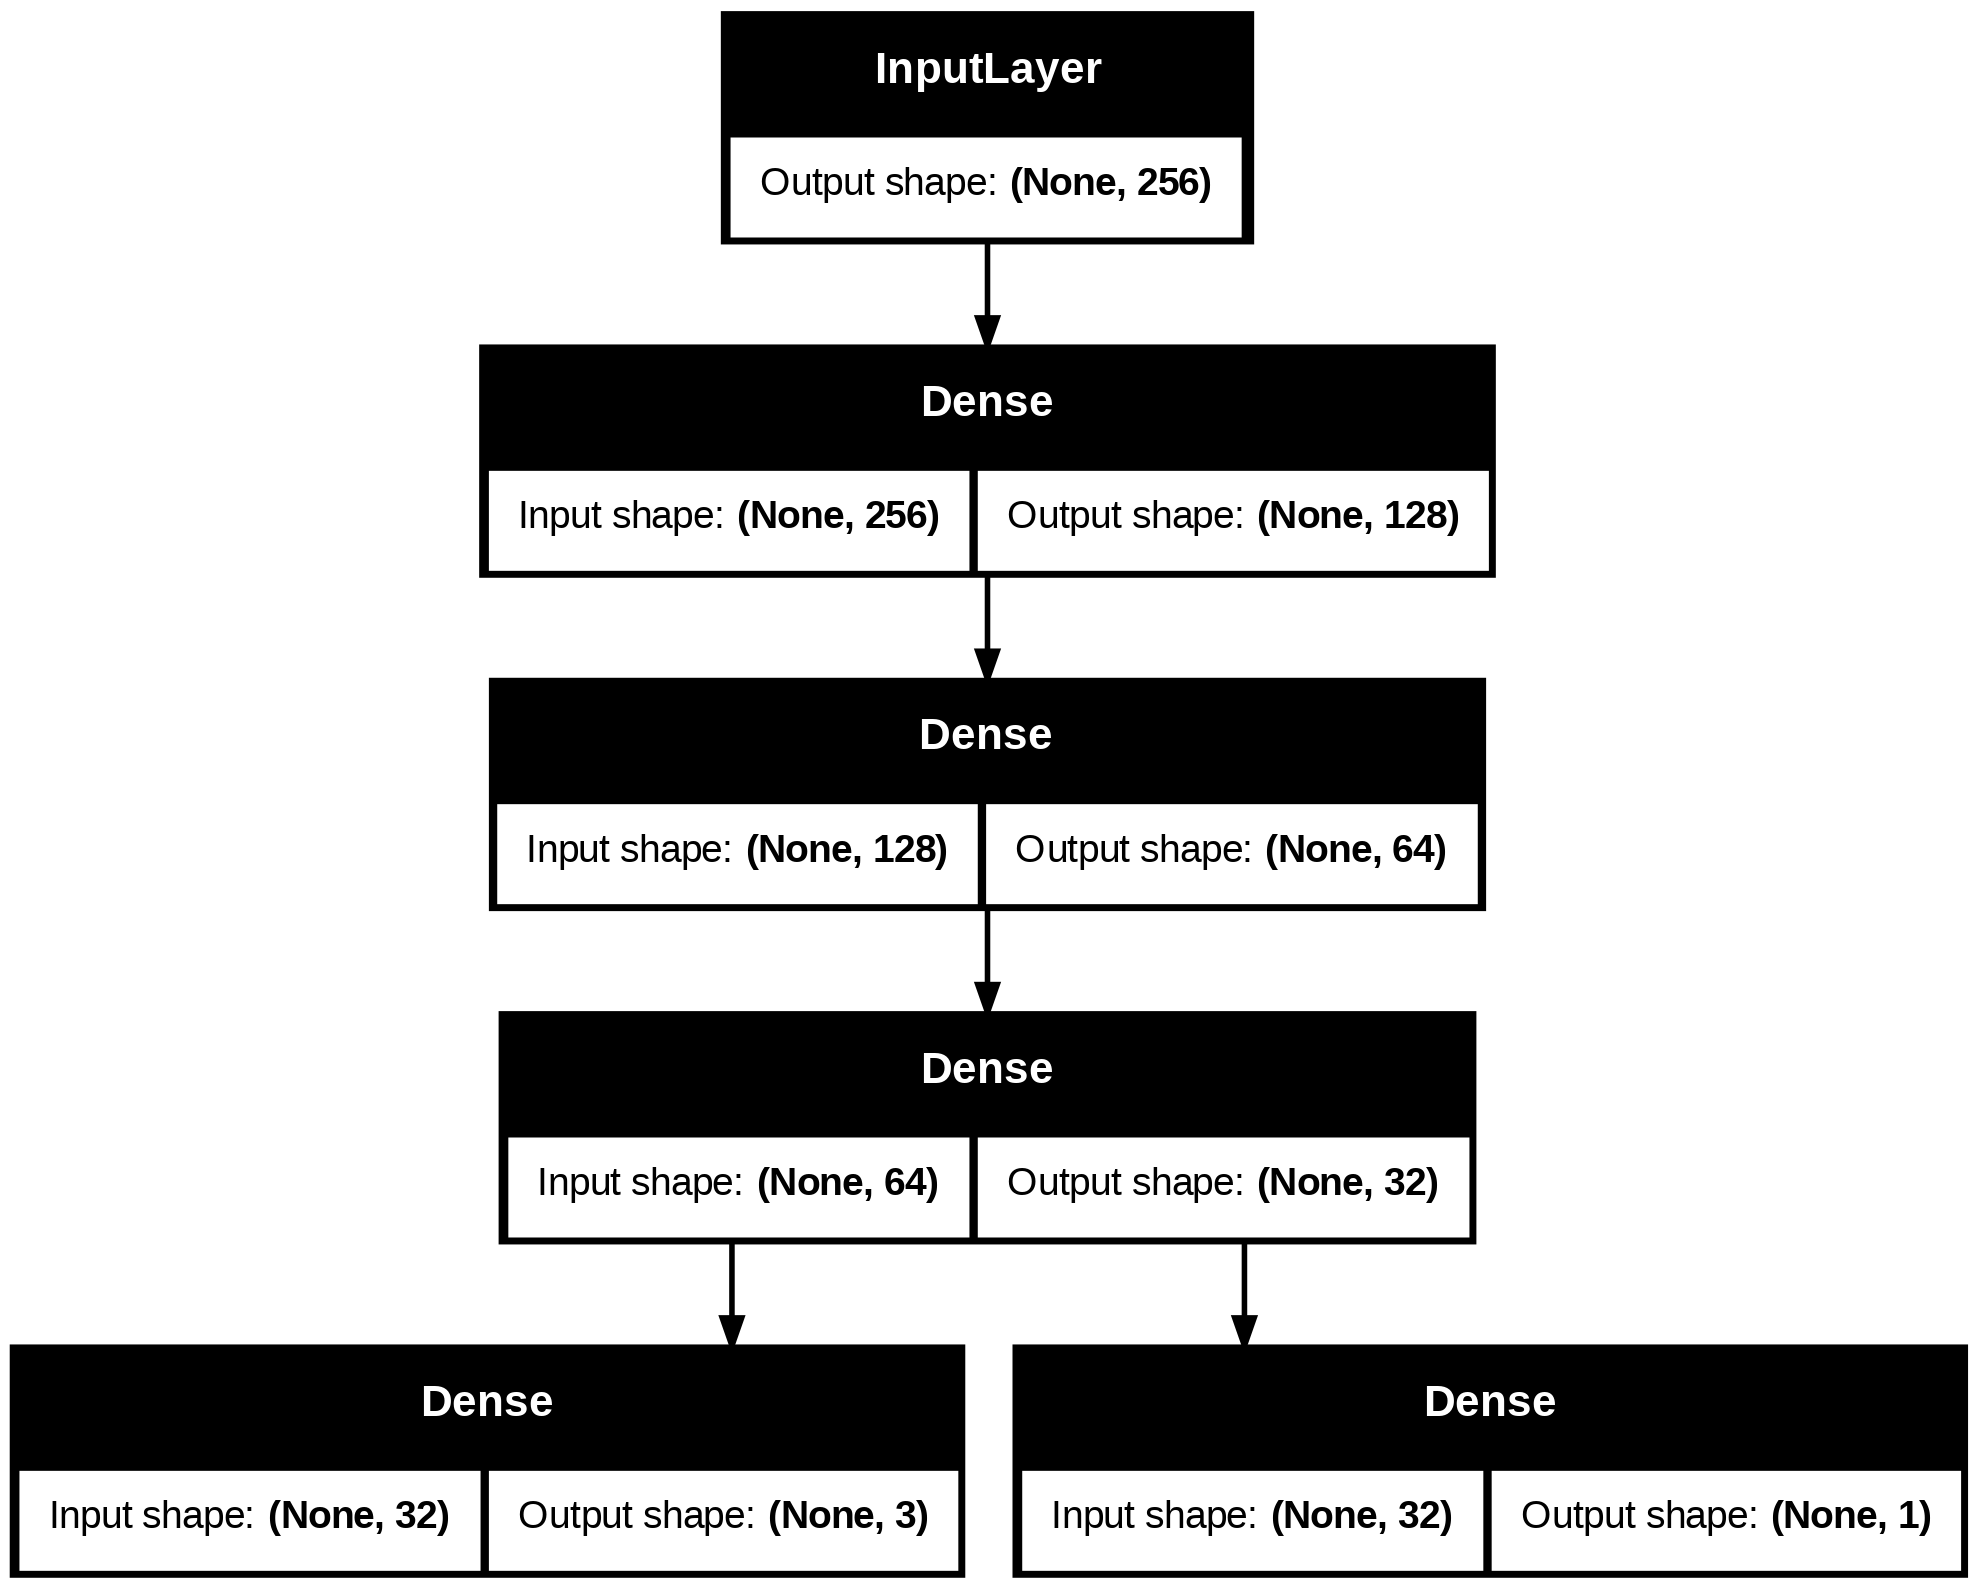

In [69]:
from tensorflow.keras.utils import plot_model  # This plot model function draw the diagram of the model
plot_model(model,show_shapes=True) # show_shapes is true is will print input and outpput shape for each layer

# **Design some complex architecture**

In [70]:
from keras.layers import Input, Dense, concatenate
from keras.models import Model

# Define the first input layer
inputa = Input(shape=(32,))
# - Input tensor for the first input, with a shape of 32 features.

# Define the second input layer
inputb = Input(shape=(128,))
# - Input tensor for the second input, with a shape of 128 features.

# Add dense layers for the first input path
dense1 = Dense(8, activation="relu")(inputa)
# - Dense layer with 8 units and ReLU activation, connected to `inputa`.
dense2 = Dense(4, activation="relu")(dense1)
# - Dense layer with 4 units and ReLU activation, connected to `dense1`.

# Add dense layers for the second input path
dense3 = Dense(64, activation="relu")(inputb)
# - Dense layer with 64 units and ReLU activation, connected to `inputb`.
dense4 = Dense(32, activation="relu")(dense3)
# - Dense layer with 32 units and ReLU activation, connected to `dense3`.
dense5 = Dense(4, activation="relu")(dense4)
# - Dense layer with 4 units and ReLU activation, connected to `dense4`.

# Concatenate the outputs of both input paths
concat = concatenate([dense2, dense5])
# - Combines the outputs from `dense2` (first path) and `dense5` (second path).

# Add a dense layer after concatenation
dense6 = Dense(2, activation="relu")(concat)
# - Dense layer with 2 units and ReLU activation, connected to the concatenated output.

# Add the final output layer
output = Dense(1, activation="sigmoid")(dense6)
# - Output layer with 1 unit and sigmoid activation (e.g., binary classification).

# Create the model
model1 = Model(inputs=[inputb, inputa], outputs=output)
# - Specifies that the model takes `inputa` and `inputb` as inputs and produces `output`.

# Print the model summary
model1.summary()
# - Displays the architecture of the model including layers, shapes, and number of parameters.


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_10            │ (None, 32)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_35 (Dense)          │ (None, 64)             │          8,256 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_33 (Dense)          │ (None, 8)              │            264 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_36 (Dense)          │ (None, 32)             │          2,080 │ dense_35[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_34 (Dense)          │ (None, 4)              │             36 │ dense_33[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_37 (Dense)          │ (None, 4)              │            132 │ dense_36[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 8)              │              0 │ dense_34[0][0],        │
│ (Concatenate)             │                        │                │ dense_37[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_38 (Dense)          │ (None, 2)              │             18 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_39 (Dense)          │ (None, 1)              │              3 │ dense_38[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,789 (42.14 KB)

 Trainable params: 10,789 (42.14 KB)

 Non-trainable params: 0 (0.00 B)

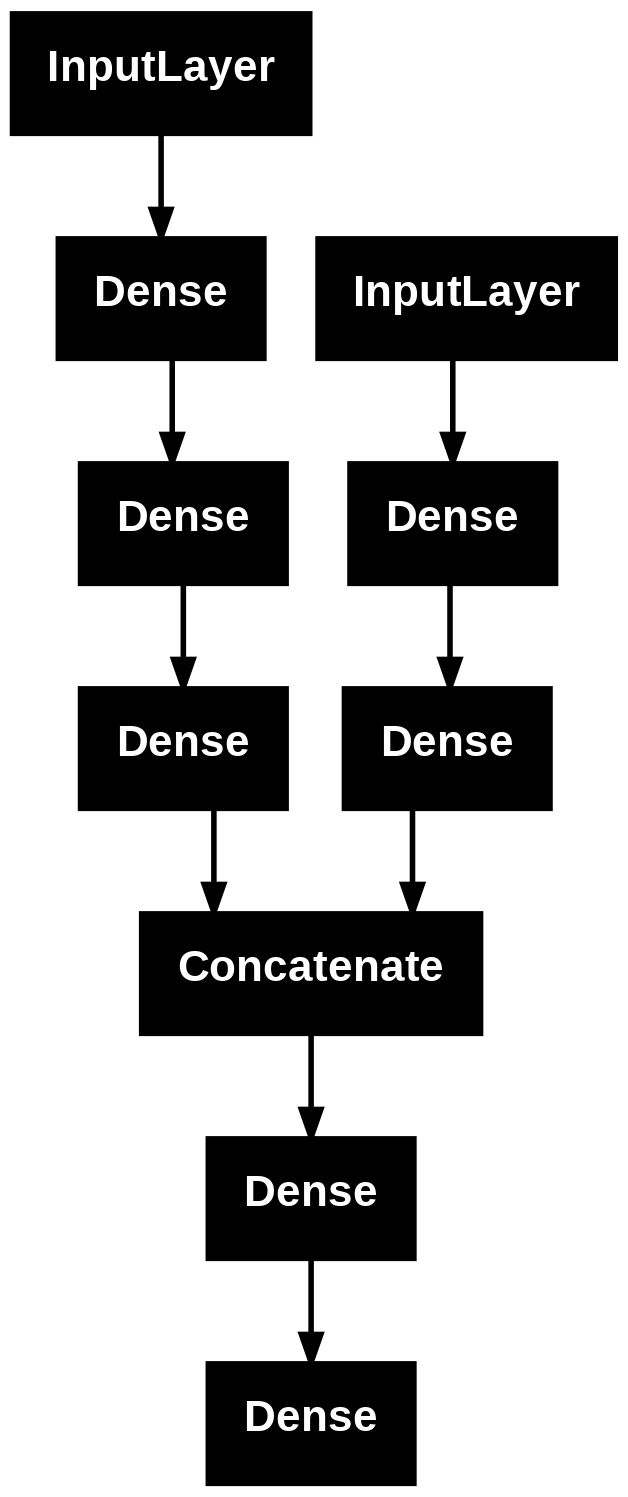

In [71]:
from tensorflow.keras.utils import plot_model  # This plot model function draw the diagram of the model
plot_model(model1) # show_shapes is true is will print input and outpput shape for each layer

# **Practical on Kaggle datset**

In [1]:
# Import dataset from kaggle

!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [14]:
! kaggle datasets download -d abhikjha/utk-face-cropped

Dataset URL: https://www.kaggle.com/datasets/abhikjha/utk-face-cropped
License(s): unknown
utk-face-cropped.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
import zipfile
zipfile = zipfile.ZipFile('utk-face-cropped.zip')
zipfile.extractall()

In [18]:
import os
import numpy
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
path = '/content/utkcropped/utkcropped'

In [31]:
from posix import listdir
age= []
gender= []
image_path = []

for file  in os.listdir(path=path):
    image_path.append(file)
    age.append(int(file.split('_')[0]))
    gender.append(int(file.split('_')[1]))


In [32]:
print(len(image_path))
print(len(age))
print(len(gender))

23709
23709
23709


In [33]:
df = pd.DataFrame({'gender':gender,'age':age,'image_path':image_path})

In [34]:
df.shape

(23709, 3)

In [35]:
df.head()

,gender,age,image_path
0,0,43,43_0_0_20170120222409079.jpg.chip.jpg
1,1,26,26_1_2_20170116184248014.jpg.chip.jpg
2,0,25,25_0_0_20170119171142840.jpg.chip.jpg
3,0,1,1_0_4_20161221195419136.jpg.chip.jpg
4,1,24,24_1_0_20170117150515251.jpg.chip.jpg


In [37]:
# split data into train and test part

train_df = df.sample(frac=1,random_state=0).iloc[:20000]
test_df = df.sample(frac=1,random_state=0).iloc[20000:]

In [46]:
from keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalizes pixel values to the range [0, 1].
    rotation_range=30,          # Randomly rotates images by up to 30 degrees.
    width_shift_range=0.2,      # Randomly shifts the image horizontally by 20% of the width.
    shear_range=0.2,            # Applies random shear transformations.
    zoom_range=0.2,             # Randomly zooms in or out by 20%.
    horizontal_flip=True        # Randomly flips images horizontally.
)

# ImageDataGenerator for testing/validation data
test_datagen = ImageDataGenerator(
    rescale=1./255              # Normalizes pixel values to the range [0, 1].
)

# Generator for training data
train_genrator = train_datagen.flow_from_dataframe(
    dataframe=train_df,          # Dataframe containing paths to images and labels.
    directory=path,              # Base directory where images are located.
    x_col='image_path',          # Column in dataframe with the relative image paths.
    y_col=['age', 'gender'],     # Columns in dataframe with target labels (multi-output: age and gender).
    target_size=(224, 224),      # Resizes all images to 224x224 pixels.
    class_mode='multi_output'    # Specifies that the output is multi-output (multiple labels per input).
)

# Generator for testing/validation data
test_genrator = test_datagen.flow_from_dataframe(
    dataframe=test_df,           # Dataframe containing paths to images and labels.
    directory=path,              # Base directory where images are located.
    x_col='image_path',          # Column in dataframe with the relative image paths.
    y_col=['age', 'gender'],     # Columns in dataframe with target labels (multi-output: age and gender).
    target_size=(224, 224),      # Resizes all images to 224x224 pixels.
    class_mode='multi_output'    # Specifies that the output is multi-output (multiple labels per input).
)


Found 20000 validated image filenames.
Found 3709 validated image filenames.


In [47]:
# Here we use transfer learnign and model use VGG16

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 224, 224, 64)   │          1,792 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 224, 224, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 112, 112, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 112, 112, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 112, 112, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 56, 56, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 56, 56, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 28, 28, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 28, 28, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 14, 14, 512)    │              0 │ block4_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)     │ (None, 14, 14, 512)    │      2,359,808 │ block4_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv2 (Conv2D)     │ (None, 14, 14, 512)    │      2,359,808 │ block5_conv1[0][0]     │
├──────────────────────

 Total params: 34,065,346 (129.95 MB)

 Trainable params: 19,350,658 (73.82 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

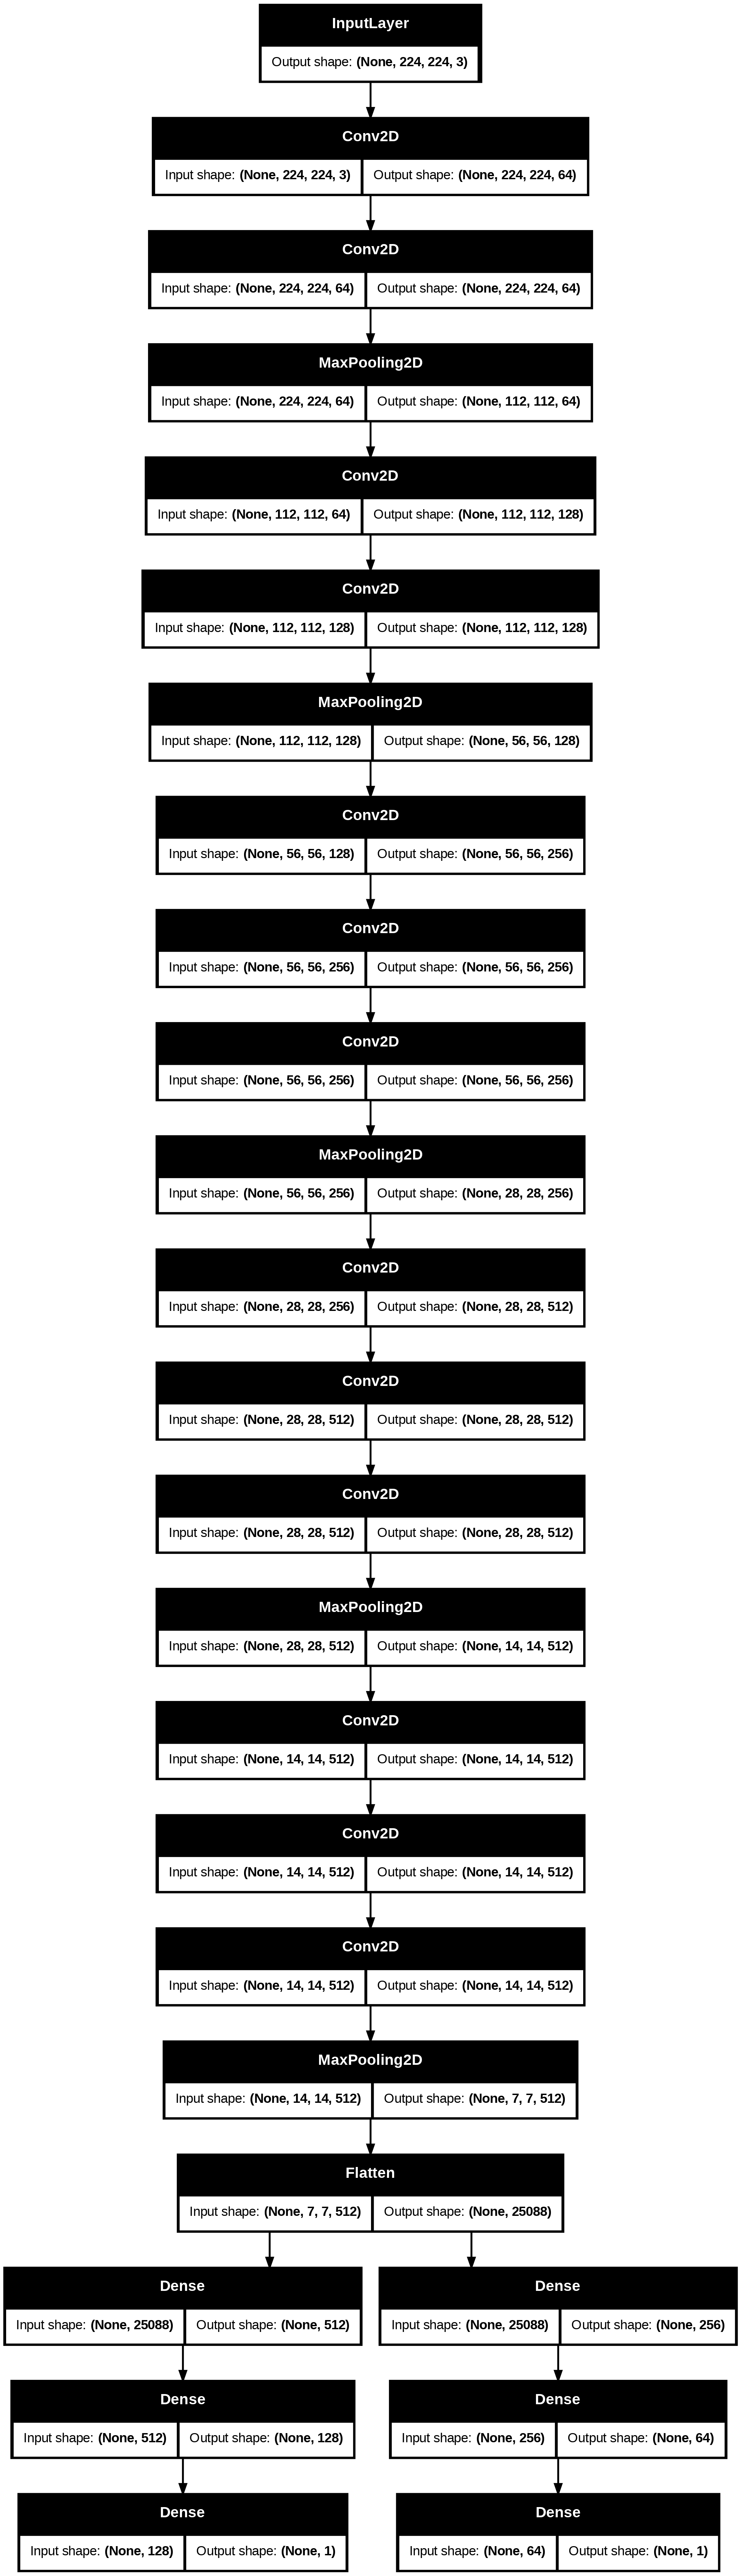

In [50]:
from keras.applications import VGG16
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.utils import plot_model

# Load the VGG16 model without the top fully connected layers
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))  # Pretrained VGG16 model for feature extraction
# - `include_top=False`: Removes the top layers (classifier) from the VGG16 model.
# - `input_shape=(224, 224, 3)`: Input images are resized to 224x224 pixels with 3 channels (RGB).

# Freeze the VGG16 layers to prevent them from being trainable
vgg.trainable = False  # This ensures the pretrained weights in VGG16 are not updated during training.

# Get the output of the last layer of the VGG16 model
output = vgg.layers[-1].output  # Extracts the output from the last convolutional layer.

# Add a Flatten layer to convert the feature maps into a 1D vector
x = Flatten()(output)  # Flattens the 3D output into a 1D vector for use in fully connected layers.

# Add dense layers for further processing
dense1 = Dense(512, activation="relu")(x)  # Fully connected layer with 512 units and ReLU activation.
dense2 = Dense(256, activation="relu")(x)  # Fully connected layer with 256 units and ReLU activation.

# Add another set of dense layers for feature extraction
dense3 = Dense(128, activation="relu")(dense1)  # Fully connected layer with 128 units, connected to `dense1`.
dense4 = Dense(64, activation="relu")(dense2)   # Fully connected layer with 64 units, connected to `dense2`.

# Define the first output layer for predicting age
y1 = Dense(1, activation="linear", name="age")(dense3)  # Regression output for age prediction (continuous values).

# Define the second output layer for predicting gender
y2 = Dense(1, activation="sigmoid", name="gender")(dense4)  # Binary classification output for gender prediction.

# Create the model by specifying the inputs and outputs
model = Model(inputs=vgg.input, outputs=[y1, y2])
# - `inputs=vgg.input`: The model takes the input of the VGG16 base.
# - `outputs=[y1, y2]`: The model has two outputs: one for age and one for gender.

# Display the model's summary
model.summary()  # Prints a summary of the model architecture.

# Visualize the model architecture
plot_model(model, show_shapes=True)
# - `show_shapes=True`: Displays the shape of the inputs and outputs for each layer.


In [59]:
model.compile(optimizer="adam",loss={'age':'mae','gender':'binary_crossentropy'},metrics={"age":"mae","gender":"accuracy"}) # model compile